# Modelos de Redes Neurais

Utilizando MLPRegressor e DecisionTreeRegressor

# VALIDAÇÃO INTERNA



## IMPORTANDO BIBLIOTECAS


In [1115]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts

from sklearn.preprocessing import StandardScaler as stdScaler

from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor as DTR

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

## LENDO BASE DE DADOS

In [1116]:
imoveis = pd.read_csv("https://tinyurl.com/alugueis-sp-df")

## ANALISANDO BASE DE DADOS

In [1117]:
imoveis

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [1118]:
imoveis.sample(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
9894,8342,1280,81,2,2,1,2,0,1,1,0,Itaim Bibi/São Paulo,rent,apartment,-23.591668,-46.683737
6053,185000,150,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,sale,apartment,-23.545155,-46.484171
2781,1200,702,65,2,2,0,1,0,0,0,0,Tucuruvi/São Paulo,rent,apartment,0.000000,0.000000
7535,200000,0,42,2,2,1,1,1,0,1,0,Vila Andrade/São Paulo,sale,apartment,-23.620472,-46.747918
9735,1600,380,47,2,2,1,1,0,0,0,0,São Mateus/São Paulo,rent,apartment,-23.593460,-46.467708


In [1119]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [1120]:
imoveis.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


In [1121]:
imoveis.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,13640.0,287737.784311,590821.416924,480.000000,1858.750000,8100.000000,360000.00000,10000000.0
Condo,13640.0,689.882331,757.649363,0.000000,290.000000,500.000000,835.00000,9500.0
Size,13640.0,84.373900,58.435676,30.000000,50.000000,65.000000,94.00000,880.0
Rooms,13640.0,2.312023,0.777461,1.000000,2.000000,2.000000,3.00000,10.0
Toilets,13640.0,2.073680,0.961803,1.000000,2.000000,2.000000,2.00000,8.0
Suites,13640.0,0.980792,0.834891,0.000000,1.000000,1.000000,1.00000,6.0
Parking,13640.0,1.393182,0.829932,0.000000,1.000000,1.000000,2.00000,9.0
Elevator,13640.0,0.354179,0.478281,0.000000,0.000000,0.000000,1.00000,1.0
Furnished,13640.0,0.146774,0.353894,0.000000,0.000000,0.000000,0.00000,1.0
Swimming Pool,13640.0,0.512170,0.499870,0.000000,0.000000,1.000000,1.00000,1.0


In [1122]:
imoveis.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [1123]:
imoveis.isna().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [1124]:
imoveis.shape

(13640, 16)

In [1125]:
imoveis.drop_duplicates()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [1126]:
imoveis.shape

(13640, 16)

In [1127]:
imoveis.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

In [1128]:
imoveis.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

In [1129]:
imoveis.nunique()

Price               1881
Condo               1415
Size                 339
Rooms                  8
Toilets                8
Suites                 7
Parking               10
Elevator               2
Furnished              2
Swimming Pool          2
New                    2
District              96
Negotiation Type       2
Property Type          1
Latitude            8405
Longitude           8451
dtype: int64

In [1130]:
imoveis.nunique(axis=1)

0        11
1        11
2        11
3        11
4        11
         ..
13635    11
13636    12
13637    11
13638    11
13639    10
Length: 13640, dtype: int64

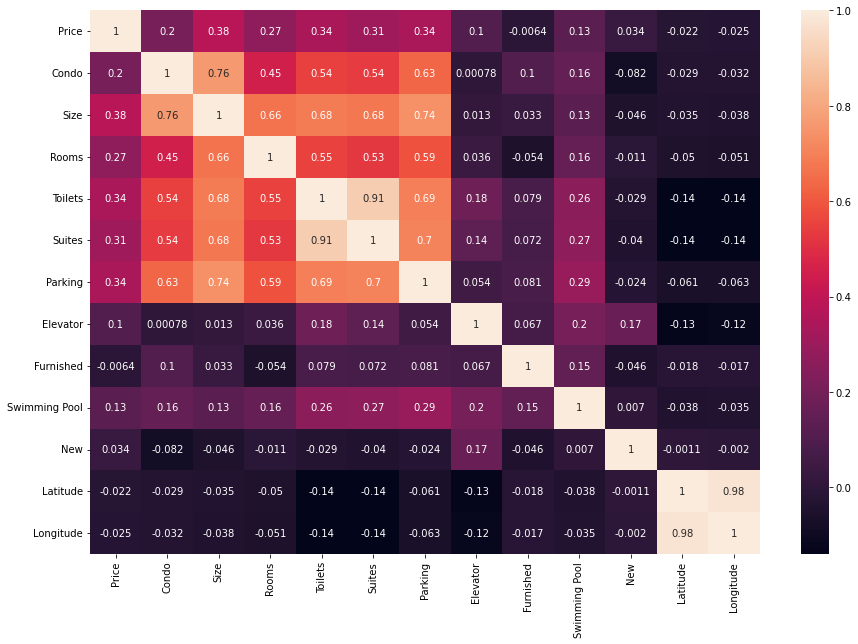

In [1131]:
plt.figure(figsize=(15, 10))
sns.heatmap(imoveis.corr(), annot=True)
plt.show()

## FILTRANDO BASE POR SALE

In [1132]:
filtroSale = imoveis[imoveis["Negotiation Type"] == "sale"]
filtroSale.sample(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
5978,950000,1300,197,4,4,3,2,1,0,0,0,Água Rasa/São Paulo,sale,apartment,-23.573746,-46.565824
12974,210000,80,40,2,1,0,1,0,0,0,0,Ponte Rasa/São Paulo,sale,apartment,-23.518698,-46.503045
12473,230000,0,45,2,1,0,1,0,0,0,0,Aricanduva/São Paulo,sale,apartment,-23.586822,-46.487506
7906,199000,0,37,2,2,1,1,0,0,0,0,Perus/São Paulo,sale,apartment,-23.406884,-46.737037
6809,249000,280,48,2,2,1,1,1,0,1,0,Vila Prudente/São Paulo,sale,apartment,-23.606003,-46.552031


## SEPARANDO TREINO E TESTE

In [1133]:
X = filtroSale.drop(
    columns=[
        "Price",
        "District",
        "Negotiation Type",
        "Property Type",
        "Latitude",
        "Longitude",
    ]
)
y = filtroSale["Price"]

x_train, x_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [1134]:
X.head(5)

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New
4901,1000,74,1,2,1,2,1,0,1,0
4902,2400,164,4,5,2,3,1,1,1,0
4903,700,70,2,2,1,1,1,0,1,1
4904,1580,155,3,5,3,2,1,0,1,0
4905,900,56,2,2,1,2,0,1,1,0


## PADRONIZANDO DADOS

In [1135]:
scaler = stdScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## NORMALIZANDO OS DADOS

In [1136]:
from sklearn.preprocessing import MinMaxScaler as MMS

normal = MMS()

x_train_norm = normal.fit_transform(x_train)
x_test_norm = normal.transform(x_test)

## DEFININDO ALGUMAS FUNÇÕES UTEIS

In [1137]:
def plot(x, y, df):
    plt.figure(figsize=(10, 7))
    ax = sns.regplot(x=x, y=y, marker="^", data=df)
    plt.title("Grafico de Predição vs Real", fontsize=20)
    plt.xlabel(x, fontsize=17)
    plt.ylabel(y, fontsize=17)
    plt.show()

In [1138]:
def metrics(x, y):
    print("-" * 30)
    print("Metricas")
    print("-" * 30)

    print(f"R2 Score: {round(r2_score(x, y), 2)}")
    print(f"MSE: { round(mse(x, y), 2)}")
    print(f"MAE: { round(mae(x, y), 2)}")

    print("-" * 30)

## PRIMEIRO MODELO

In [1139]:
def simpleModel(x_train, x_test, y_train, y_test):
    mlp = MLPRegressor(hidden_layer_sizes=(5,), random_state=1, max_iter=3000)

    mlp.fit(x_train, y_train)

    y_pred = mlp.predict(x_test)

    metrics(y_pred, y_test)

    df_temp = pd.DataFrame({"Real": y_test, "Predição": y_pred})
    display(round(df_temp.head(5)))

    plot("Real", "Predição", df=df_temp)

## Teste do primeiro modelo sem dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.05
MSE: 207987226417.81
MAE: 222011.54
------------------------------


,Real,Predição
5722,329000,450577.0
11607,320000,663000.0
6794,230000,267057.0
7307,910000,994859.0
12224,775000,777236.0


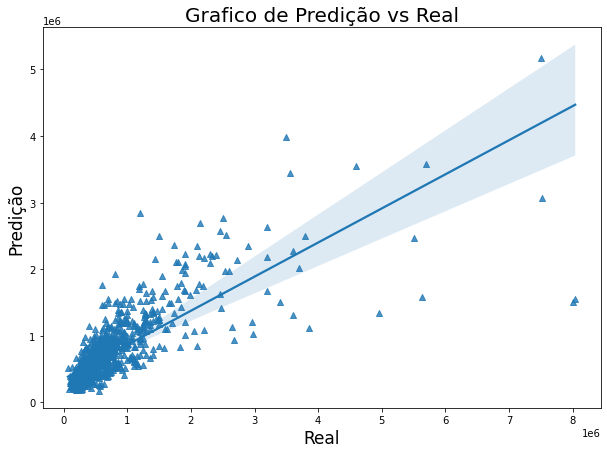

In [1140]:
simpleModel(x_train, x_test, y_train, y_test)

## Teste do primeiro modelo com dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: -100.62
MSE: 749342243321.48
MAE: 563831.41
------------------------------


,Real,Predição
5722,329000,77.0
11607,320000,81955.0
6794,230000,77.0
7307,910000,58079.0
12224,775000,98501.0


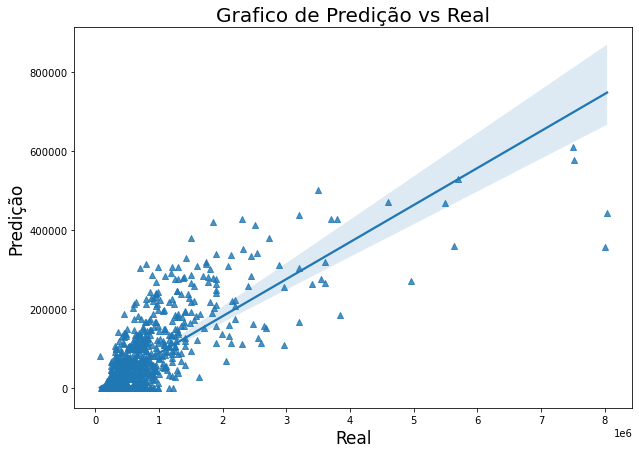

In [1141]:
simpleModel(x_train_scaled, x_test_scaled, y_train, y_test)

## Teste do primeiro modelo com dados normalizados

------------------------------
Metricas
------------------------------
R2 Score: -1221.37
MSE: 807730703865.51
MAE: 551955.66
------------------------------


,Real,Predição
5722,329000,72584.0
11607,320000,98178.0
6794,230000,36697.0
7307,910000,50270.0
12224,775000,87321.0


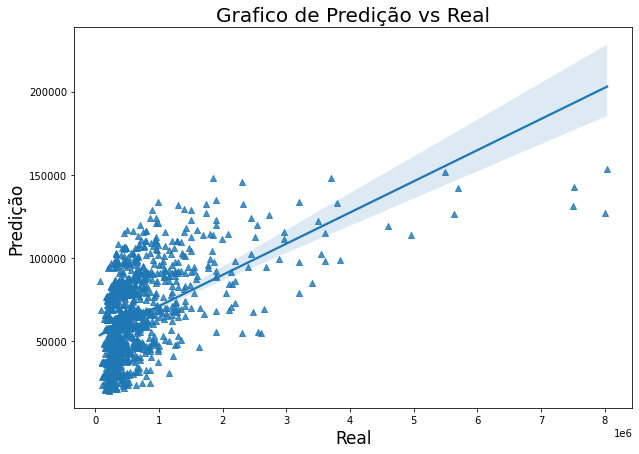

In [1142]:
simpleModel(x_train_norm, x_test_norm, y_train, y_test)

## SEGUNDO MODELO

In [1143]:
def lessSimpleModel(x_train, x_test, y_train, y_test):
    mlp = MLPRegressor(
        hidden_layer_sizes=(5, 3),
        random_state=4,
        max_iter=4000,
        solver="lbfgs",
        learning_rate_init=0.5,
        activation="relu",
    )

    mlp.fit(x_train, y_train)

    y_pred = mlp.predict(x_test)

    metrics(y_pred, y_test)

    df_temp = pd.DataFrame({"Real": y_test, "Predição": y_pred})
    display(round(df_temp.head(5)))

    plot("Real", "Predição", df=df_temp)

## Teste do segundo modelo sem dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.61
MSE: 151235426138.6
MAE: 201855.7
------------------------------


,Real,Predição
5722,329000,409767.0
11607,320000,626668.0
6794,230000,153703.0
7307,910000,979500.0
12224,775000,682619.0


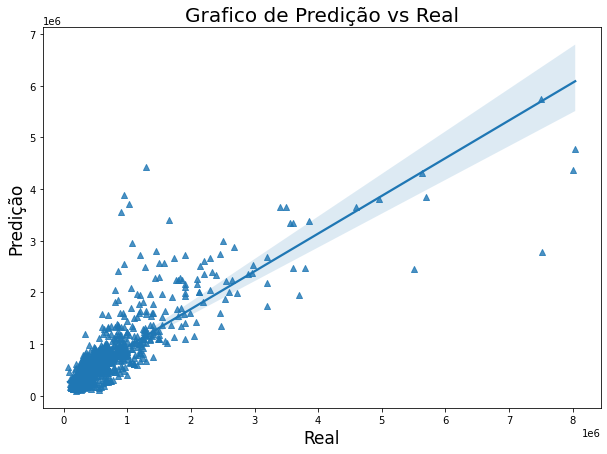

In [1144]:
lessSimpleModel(x_train, x_test, y_train, y_test)

## Teste do segundo modelo com dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.74
MSE: 106351884543.77
MAE: 159597.4
------------------------------


,Real,Predição
5722,329000,412282.0
11607,320000,557096.0
6794,230000,203155.0
7307,910000,890399.0
12224,775000,710260.0


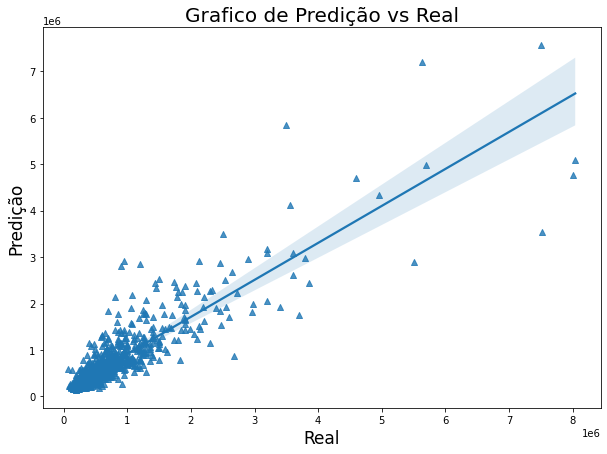

In [1145]:
lessSimpleModel(x_train_scaled, x_test_scaled, y_train, y_test)

## Teste do segundo modelo com dados normalizados

------------------------------
Metricas
------------------------------
R2 Score: 0.7
MSE: 124491732633.28
MAE: 166106.63
------------------------------


,Real,Predição
5722,329000,423407.0
11607,320000,535178.0
6794,230000,222711.0
7307,910000,992742.0
12224,775000,730242.0


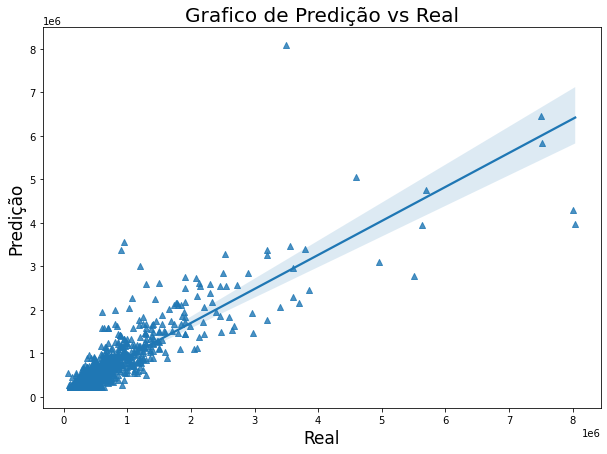

In [1146]:
lessSimpleModel(x_train_norm, x_test_norm, y_train, y_test)

## TERCEIRO MODELO

In [1147]:
def middleModel(x_train, x_test, y_train, y_test):
    mlp = MLPRegressor(
        hidden_layer_sizes=(
            8,
            10,
        ),
        random_state=1,
        solver="lbfgs",
        max_iter=6000,
        learning_rate_init=0.001,
        activation="relu",
    )

    mlp.fit(x_train, y_train)

    y_pred = mlp.predict(x_test)

    metrics(y_pred, y_test)

    df_temp = pd.DataFrame({"Real": y_test, "Predição": y_pred})
    display(round(df_temp.head(5)))

    plot("Real", "Predição", df=df_temp)

## Teste do terceiro modelo sem dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.67
MSE: 141022637804.27
MAE: 169558.06
------------------------------


,Real,Predição
5722,329000,458319.0
11607,320000,509011.0
6794,230000,225915.0
7307,910000,968144.0
12224,775000,641034.0


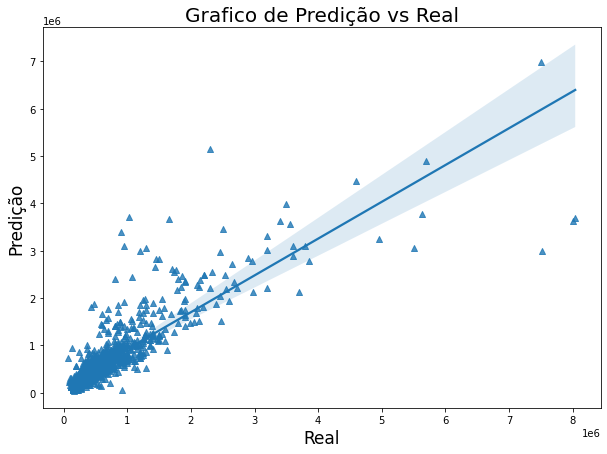

In [1148]:
middleModel(x_train, x_test, y_train, y_test)

## Teste do terceiro modelo com dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.76
MSE: 104523278362.63
MAE: 150647.41
------------------------------


,Real,Predição
5722,329000,422480.0
11607,320000,549300.0
6794,230000,183489.0
7307,910000,1007450.0
12224,775000,621926.0


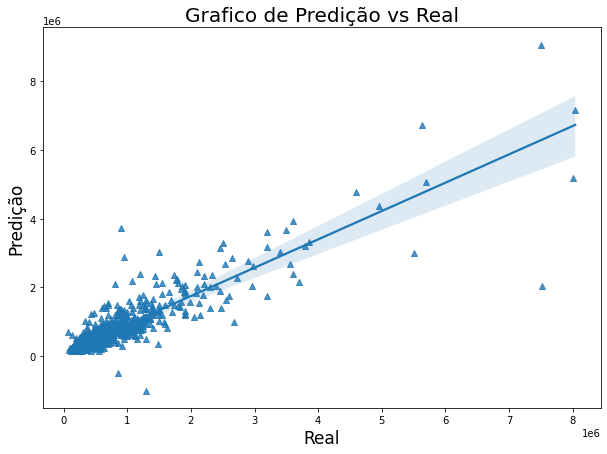

In [1149]:
middleModel(x_train_scaled, x_test_scaled, y_train, y_test)

## Teste do terceiro modelo com dados normalizados

------------------------------
Metricas
------------------------------
R2 Score: 0.74
MSE: 106076346088.92
MAE: 164015.9
------------------------------


,Real,Predição
5722,329000,430626.0
11607,320000,548013.0
6794,230000,196958.0
7307,910000,976096.0
12224,775000,726435.0


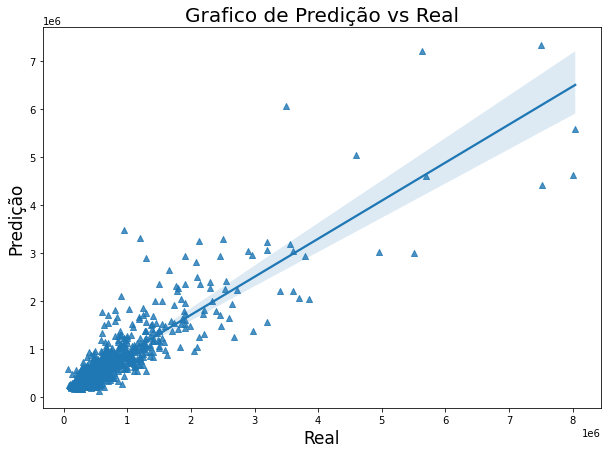

In [1150]:
middleModel(x_train_norm, x_test_norm, y_train, y_test)

## QUARTO MODELO

In [1151]:
def finalModel(x_train, x_test, y_train, y_test):
    # mlp = MLPRegressor(hidden_layer_sizes = (10, 21,),
    #                   random_state = 1,
    #                   solver = "lbfgs",
    #                   max_iter = 104,
    #                   learning_rate_init = 0.001,
    #                   activation = "relu"
    #                  )

    mlp = MLPRegressor(
        hidden_layer_sizes=(11,),
        random_state=4,
        solver="adam",
        beta_1=0.7,
        max_iter=8000,
        learning_rate_init=0.3,
        activation="relu",
    )

    mlp.fit(x_train, y_train)

    y_pred = mlp.predict(x_test)

    metrics(y_pred, y_test)

    df_temp = pd.DataFrame({"Real": y_test, "Predição": y_pred})
    display(round(df_temp.head(5)))

    plot("Real", "Predição", df=df_temp)

## Teste do quarto modelo sem dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.63
MSE: 140046437275.53
MAE: 180049.89
------------------------------


,Real,Predição
5722,329000,385228.0
11607,320000,488265.0
6794,230000,279715.0
7307,910000,919573.0
12224,775000,568547.0


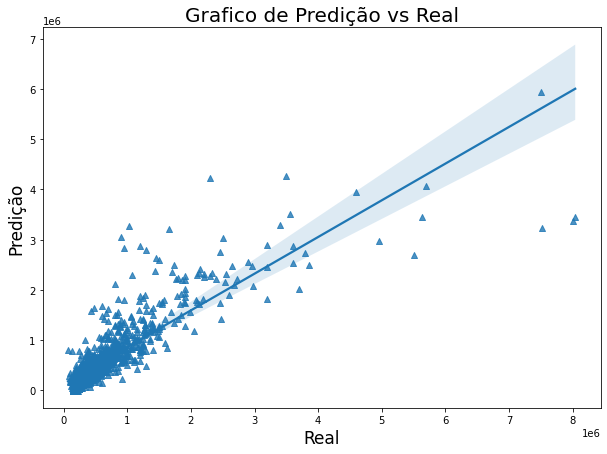

In [1152]:
finalModel(x_train, x_test, y_train, y_test)

## Teste do quarto modelo com dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.73
MSE: 117586142550.25
MAE: 159822.14
------------------------------


,Real,Predição
5722,329000,433278.0
11607,320000,525252.0
6794,230000,201287.0
7307,910000,959299.0
12224,775000,596019.0


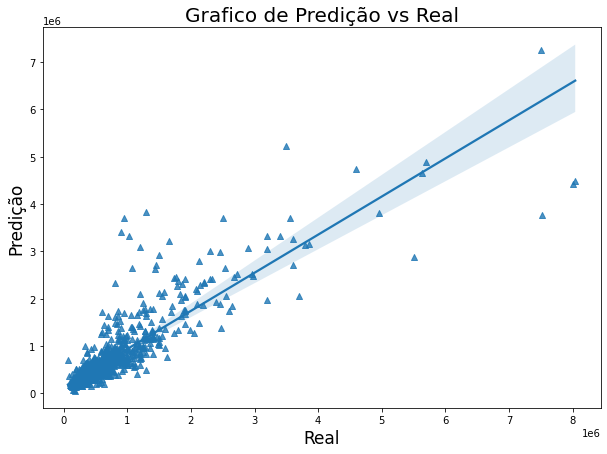

In [1153]:
finalModel(x_train_scaled, x_test_scaled, y_train, y_test)

## Teste do quarto modelo com dados normalizados

------------------------------
Metricas
------------------------------
R2 Score: 0.7
MSE: 129358776396.44
MAE: 165778.18
------------------------------


,Real,Predição
5722,329000,413973.0
11607,320000,534118.0
6794,230000,204538.0
7307,910000,940381.0
12224,775000,722827.0


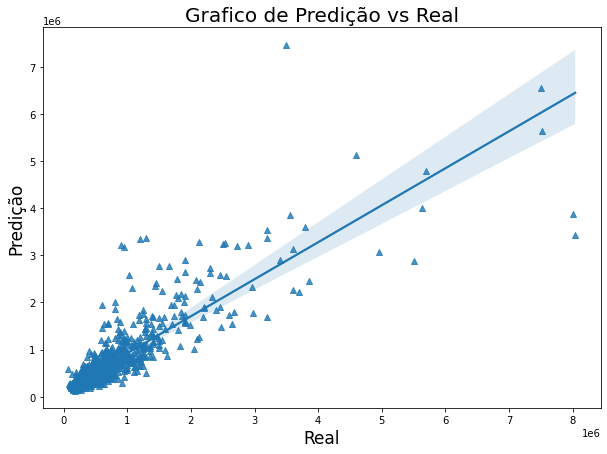

In [1154]:
finalModel(x_train_norm, x_test_norm, y_train, y_test)

### Verificando se há overfitting no quarto modelo

------------------------------
Metricas
------------------------------
R2 Score: 0.79
MSE: 96394245985.45
MAE: 149316.63
------------------------------


,Real,Predição
8742,430000,426842.0
7271,240000,237625.0
5936,382900,341385.0
8697,360000,565098.0
11021,570000,536603.0


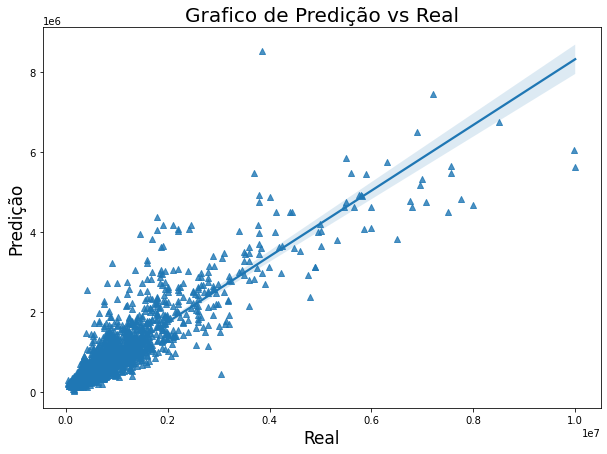

In [1155]:
finalModel(x_train_scaled, x_train_scaled, y_train, y_train)

## QUINTO MODELO (DECISION TREE REGRESSOR)

In [1156]:
def DTRModel(x_train, x_test, y_train, y_test):
    tree = DTR(max_depth=4)
    tree.fit(x_train, y_train)

    pred = tree.predict(x_test)

    metrics(pred, y_test)

    df_temp = pd.DataFrame({"Real": y_test, "Predição": pred})
    display(round(df_temp.head(5)))

    plot("Real", "Predição", df=df_temp)

## Teste do quinto modelo sem dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.71
MSE: 129472553514.98
MAE: 174976.83
------------------------------


,Real,Predição
5722,329000,250687.0
11607,320000,607643.0
6794,230000,250687.0
7307,910000,979999.0
12224,775000,701401.0


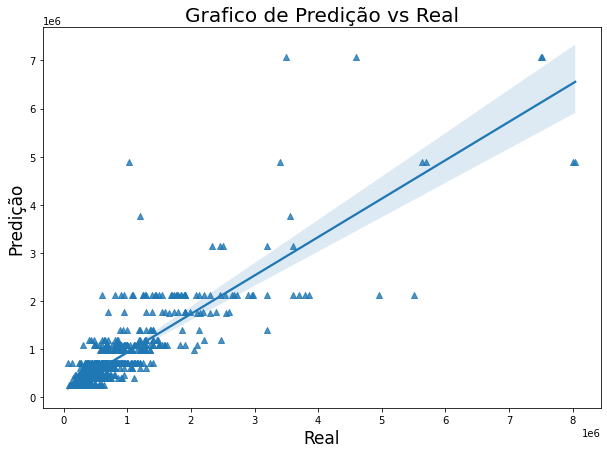

In [1157]:
DTRModel(x_train, x_test, y_train, y_test)

## Teste do quinto modelo com dados padronizados

------------------------------
Metricas
------------------------------
R2 Score: 0.71
MSE: 129472553514.98
MAE: 174976.83
------------------------------


,Real,Predição
5722,329000,250687.0
11607,320000,607643.0
6794,230000,250687.0
7307,910000,979999.0
12224,775000,701401.0


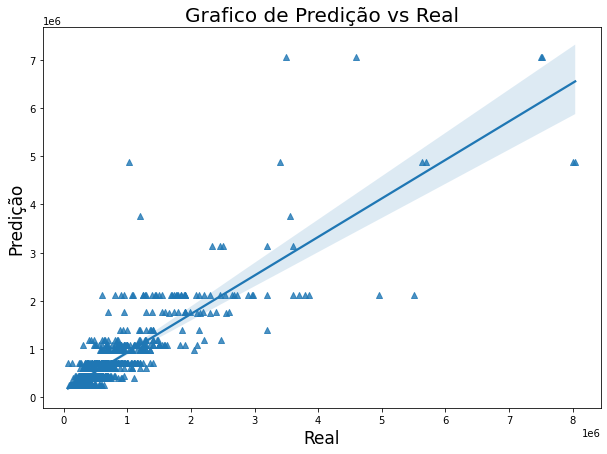

In [1158]:
DTRModel(x_train_scaled, x_test_scaled, y_train, y_test)

## Teste do quinto modelo com dados normalizados

------------------------------
Metricas
------------------------------
R2 Score: 0.71
MSE: 129472553514.98
MAE: 174976.83
------------------------------


,Real,Predição
5722,329000,250687.0
11607,320000,607643.0
6794,230000,250687.0
7307,910000,979999.0
12224,775000,701401.0


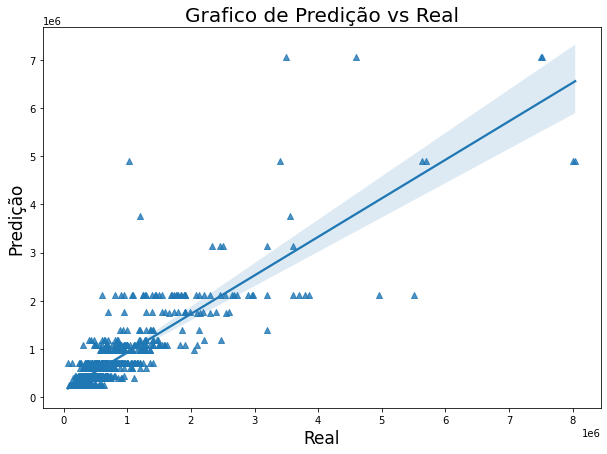

In [1159]:
DTRModel(x_train_norm, x_test_norm, y_train, y_test)

### Verificando se há overfitting no quinto modelo

------------------------------
Metricas
------------------------------
R2 Score: 0.79
MSE: 95960885917.97
MAE: 161095.4
------------------------------


,Real,Predição
8742,430000,449415.0
7271,240000,250687.0
5936,382900,250687.0
8697,360000,395379.0
11021,570000,607643.0


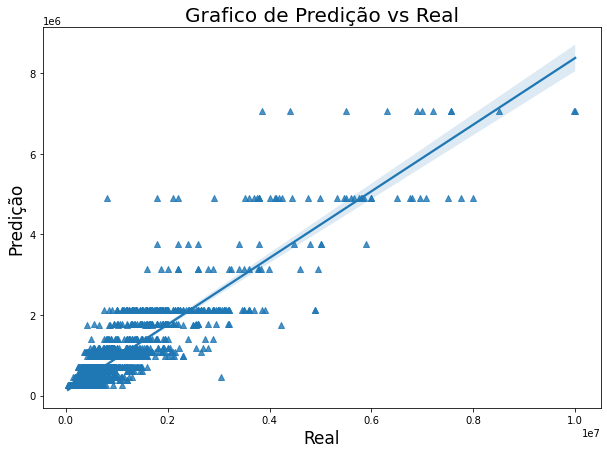

In [1160]:
DTRModel(x_train, x_train, y_train, y_train)

# VALIDAÇÃO EXTERNA

## IMPORTANDO BASE

In [1161]:
imoveisExternos = pd.read_excel("imoveis.xlsx")

## LIMPANDO A BASE

In [1162]:
imoveisExternos = imoveisExternos.drop(columns=["latitude", "longitude"])

## SEPARANDO A BASE

In [1163]:
X = imoveisExternos.drop(columns=["price"])
y = imoveisExternos["price"]

In [1164]:
X = scaler.transform(X)

## Lendo base

In [1165]:
X

array([[-0.21744536, -0.47918857, -0.44033241, -1.13322538, -1.20748803,
         0.90595201, -0.83802749, -0.36260206,  0.92102567, -0.18231655],
       [-0.85395463, -0.0266316 ,  0.95636822, -0.03240853,  0.10130447,
        -0.42928588,  1.19327828, -0.36260206,  0.92102567, -0.18231655],
       [-0.85395463, -0.16436633,  0.95636822, -0.03240853,  0.10130447,
         0.90595201,  1.19327828, -0.36260206,  0.92102567, -0.18231655],
       [-0.85236336, -0.26274828, -0.44033241, -1.13322538,  0.10130447,
         0.90595201, -0.83802749, -0.36260206, -1.08574607, -0.18231655],
       [-0.50387453, -0.6169233 , -0.44033241, -0.03240853,  0.10130447,
        -0.42928588,  1.19327828, -0.36260206, -1.08574607, -0.18231655]])

In [1166]:
imoveisExternos

,price,condo,size,rooms,toilets,suits,parking,elevator,furnished,swimming pool,new
0,350000,400,54,2,1,0,2,0,0,1,0
1,550000,0,77,3,2,1,1,1,0,1,0
2,480000,0,70,3,2,1,2,1,0,1,0
3,405000,1,65,2,1,1,2,0,0,0,0
4,300000,220,47,2,2,1,1,1,0,0,0


In [1167]:
x_train.sample(5)

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New
12289,2900,386,5,5,2,5,0,0,1,0
11590,250,38,2,2,1,1,1,0,1,0
12879,100,56,2,1,0,1,0,0,0,0
12793,290,42,2,1,0,1,0,0,0,0
12476,240,48,2,1,0,1,0,0,0,0


In [1168]:
imoveisExternos.sample(5)

,price,condo,size,rooms,toilets,suits,parking,elevator,furnished,swimming pool,new
0,350000,400,54,2,1,0,2,0,0,1,0
1,550000,0,77,3,2,1,1,1,0,1,0
4,300000,220,47,2,2,1,1,1,0,0,0
3,405000,1,65,2,1,1,2,0,0,0,0
2,480000,0,70,3,2,1,2,1,0,1,0


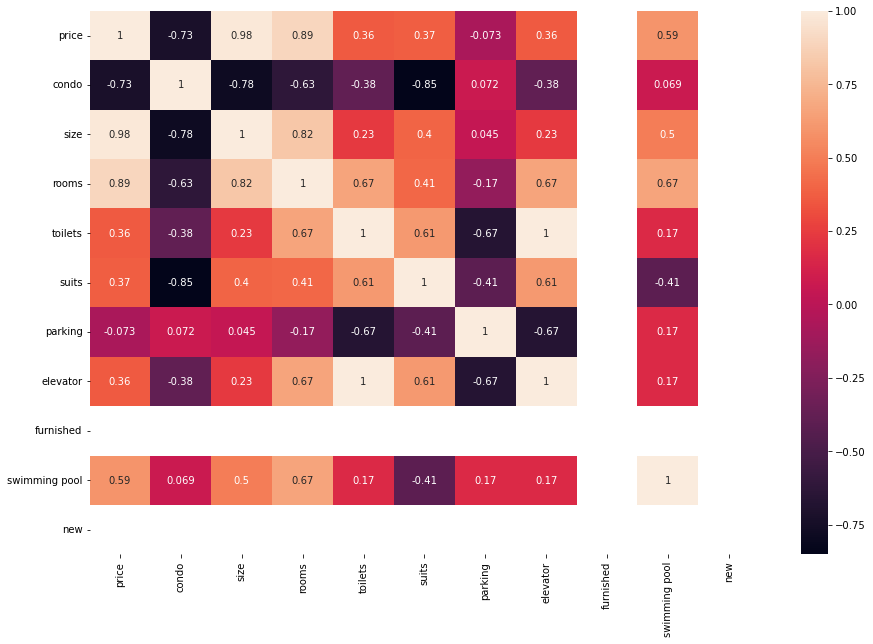

In [1169]:
plt.figure(figsize=(15, 10))
sns.heatmap(imoveisExternos.corr(), annot=True)
plt.show()

## Testes com Padronização dos dados

------------------------------
Metricas
------------------------------
R2 Score: 0.67
MSE: 4614146368.37
MAE: 63443.08
------------------------------


,Real,Predição
0,350000,408572.0
1,550000,500176.0
2,480000,513874.0
3,405000,473667.0
4,300000,193722.0


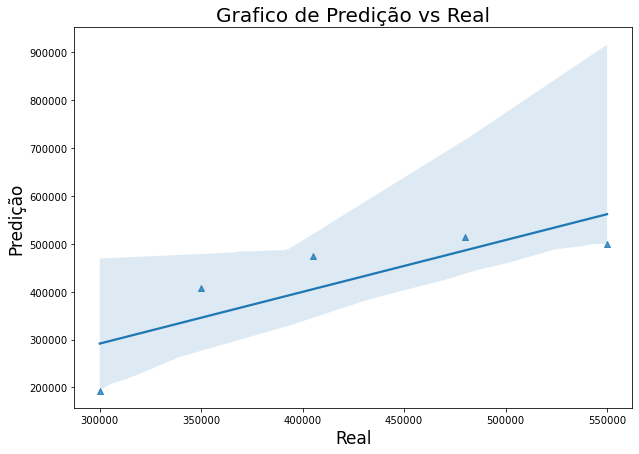

In [1170]:
finalModel(x_train_scaled, X, y_train, y)

------------------------------
Metricas
------------------------------
R2 Score: 0.84
MSE: 2182555520.3
MAE: 38108.45
------------------------------


,Real,Predição
0,350000,341522.0
1,550000,514071.0
2,480000,524525.0
3,405000,421126.0
4,300000,214516.0


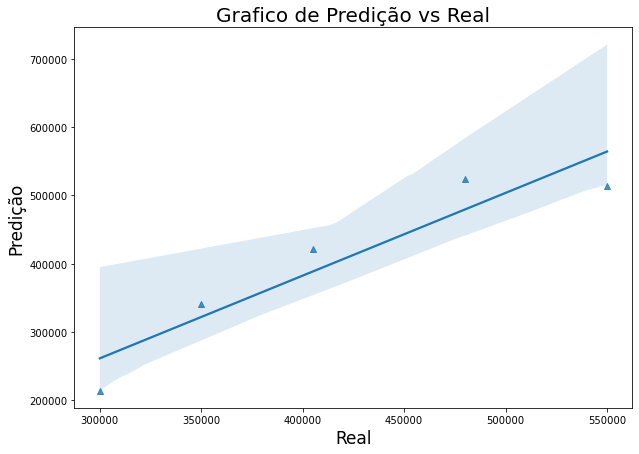

In [1171]:
middleModel(x_train_scaled, X, y_train, y)

------------------------------
Metricas
------------------------------
R2 Score: 0.05
MSE: 5354028609.73
MAE: 64467.33
------------------------------


,Real,Predição
0,350000,398053.0
1,550000,424929.0
2,480000,427247.0
3,405000,383068.0
4,300000,225471.0


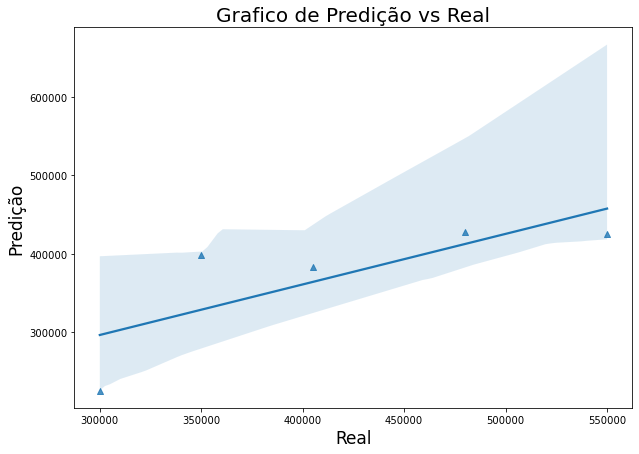

In [1172]:
lessSimpleModel(x_train_scaled, X, y_train, y)

------------------------------
Metricas
------------------------------
R2 Score: -164.39
MSE: 158361160088.1
MAE: 392322.81
------------------------------


,Real,Predição
0,350000,77.0
1,550000,50429.0
2,480000,72726.0
3,405000,77.0
4,300000,77.0


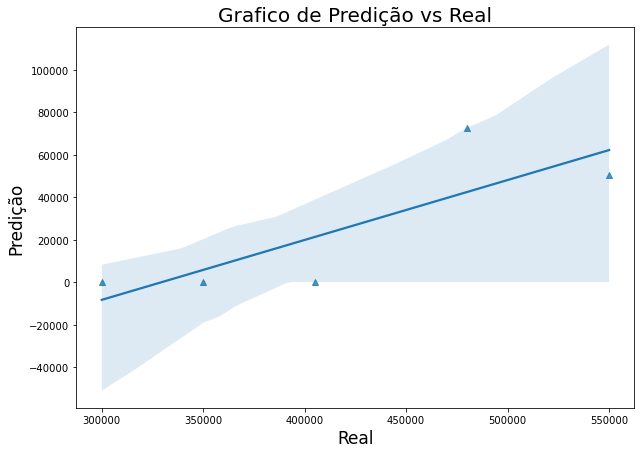

In [1173]:
simpleModel(x_train_scaled, X, y_train, y)

## Testes sem padronização dos dados

------------------------------
Metricas
------------------------------
R2 Score: -35555358752.53
MSE: 182137218017.2
MAE: 417301.99
------------------------------


,Real,Predição
0,350000,-301.0
1,550000,-305.0
2,480000,-305.0
3,405000,-299.0
4,300000,-302.0


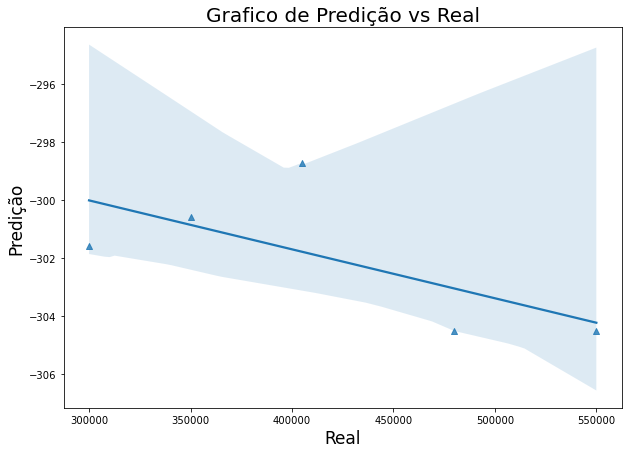

In [1174]:
finalModel(x_train, X, y_train, y)

------------------------------
Metricas
------------------------------
R2 Score: -9.44
MSE: 127551405289.09
MAE: 313922.78
------------------------------


,Real,Predição
0,350000,110559.0
1,550000,2571.0
2,480000,1107.0
3,405000,304287.0
4,300000,96862.0


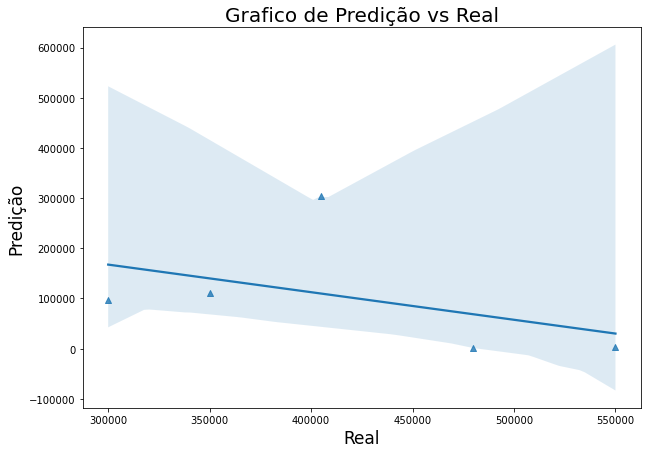

In [1175]:
middleModel(x_train, X, y_train, y)

------------------------------
Metricas
------------------------------
R2 Score: -66.61
MSE: 153574385513.59
MAE: 382571.67
------------------------------


,Real,Predição
0,350000,-1.0
1,550000,3904.0
2,480000,124649.0
3,405000,41552.0
4,300000,2038.0


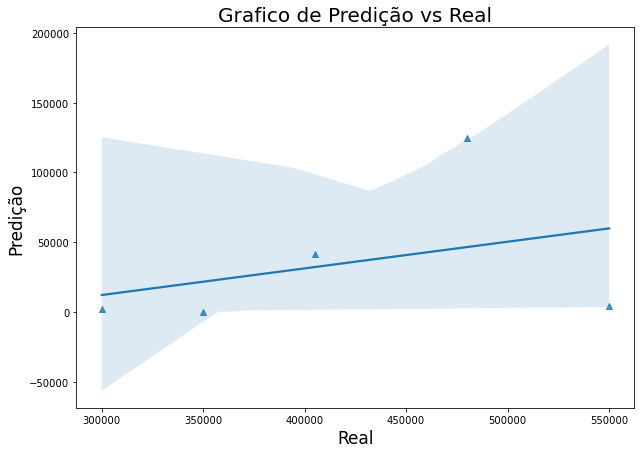

In [1176]:
lessSimpleModel(x_train, X, y_train, y)

------------------------------
Metricas
------------------------------
R2 Score: -2748.3
MSE: 175557905657.39
MAE: 410661.97
------------------------------


,Real,Predição
0,350000,32.0
1,550000,12555.0
2,480000,19040.0
3,405000,32.0
4,300000,32.0


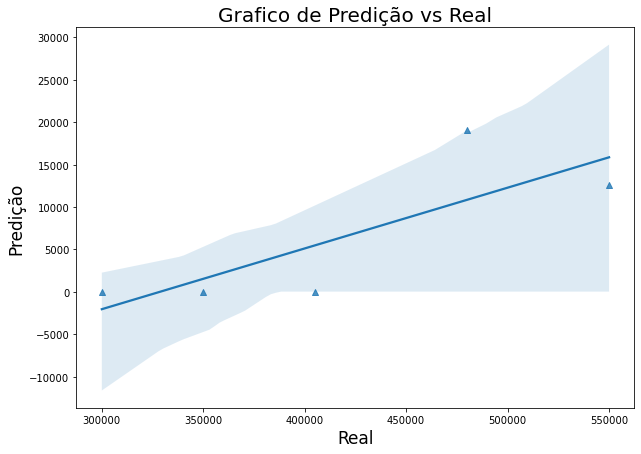

In [1177]:
simpleModel(x_train, X, y_train, y)

# TESTE FINAL

------------------------------
Metricas
------------------------------
R2 Score: 0.67
MSE: 4614146368.37
MAE: 63443.08
------------------------------


,Real,Predição
0,350000,408572.0
1,550000,500176.0
2,480000,513874.0
3,405000,473667.0
4,300000,193722.0


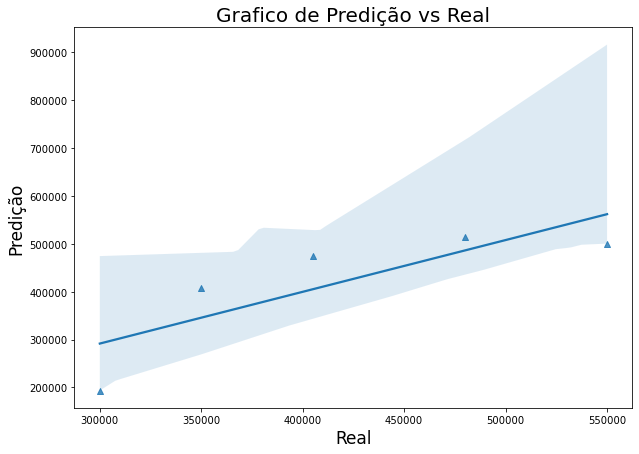

In [1178]:
finalModel(x_train_scaled, X, y_train, y)

------------------------------
Metricas
------------------------------
R2 Score: 1.0
MSE: 0.01
MAE: 0.08
------------------------------


,Real,Predição
0,350000,350000.0
1,550000,550000.0
2,480000,480000.0
3,405000,405000.0
4,300000,300000.0


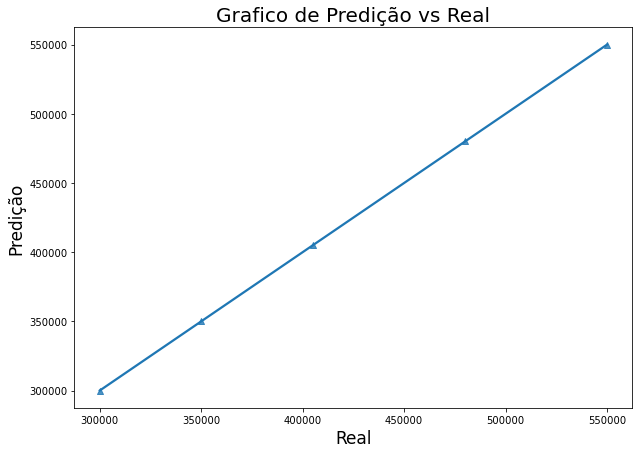

In [1179]:
finalModel(X, X, y, y)

------------------------------
Metricas
------------------------------
R2 Score: 0.47
MSE: 5064058612.48
MAE: 64842.18
------------------------------


,Real,Predição
0,350000,250687.0
1,550000,449415.0
2,480000,449415.0
3,405000,449415.0
4,300000,250687.0


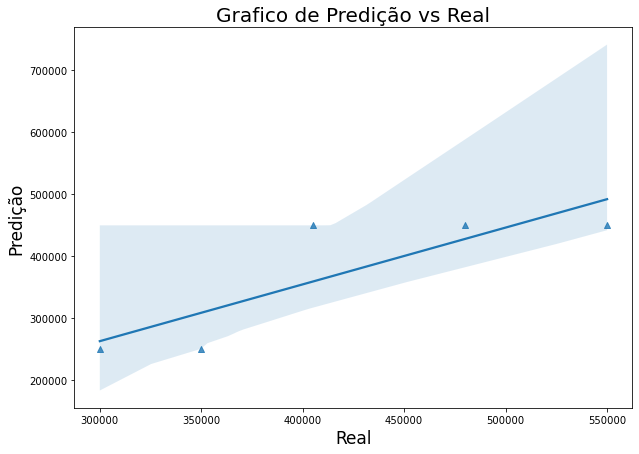

In [1180]:
DTRModel(x_train_scaled, X, y_train, y)

# Conclusão

------------------------------
Metricas
------------------------------
R2 Score: 0.84
MSE: 2182555520.3
MAE: 38108.45
------------------------------


,Real,Predição
0,350000,341522.0
1,550000,514071.0
2,480000,524525.0
3,405000,421126.0
4,300000,214516.0


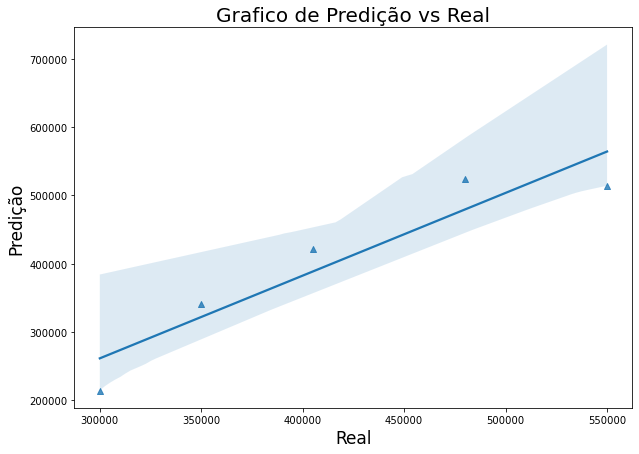

In [1181]:
middleModel(x_train_scaled, X, y_train, y)